<h1 style="background-color:powderblue; align: center"> Aula 4 </h1>

Importação das Bibliotecas e Dados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [2]:
provas = ["NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)

In [3]:
provas_entrada = ["NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0 ")

dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]

In [4]:
x = notas_entrada
y = notas_saida

In [16]:
from sklearn.model_selection import train_test_split
SEED = 4321
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [17]:
x_train.head()

,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_REDACAO
90200,542.7,523.2,567.7,660.0
12375,445.2,423.0,497.1,580.0
46320,454.0,528.5,494.0,520.0
111208,385.8,572.7,561.9,640.0
75943,625.7,646.5,686.5,900.0


In [19]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_train, y_train)

LinearSVR(random_state=4321)

In [20]:
predicoes = modelo.predict(x_test)

In [21]:
y_test[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50, 1050)

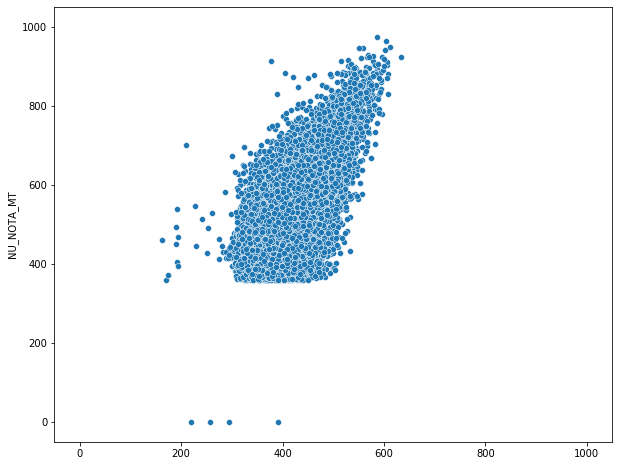

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x= predicoes, y=y_test)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))


In [23]:
resultados = pd.DataFrame()
resultados["Real"] = y_test
resultados["Previsao"] = predicoes
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["diferenca_quadrado"] = (resultados["Real"] - resultados["Previsao"])**2

In [24]:
resultados

,Real,Previsao,diferenca,diferenca_quadrado
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [25]:
resultados["diferenca_quadrado"].mean()

18324.119724009073

In [15]:
resultados["diferenca_quadrado"].mean()**(1/2)

135.366612294203

In [26]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_train, y_train)
dummy_predictions = modelo_dummy.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, dummy_predictions)

12063.645588509502

In [29]:
mean_squared_error(y_test, predicoes)

18324.119724009073